# Rám

Vypracoval: Filip Horák, 2017/2018

U uzavřeného prutu dle obrázku vypočtěte posunutí bodu B.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
import sympy as sp
import numpy as np
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

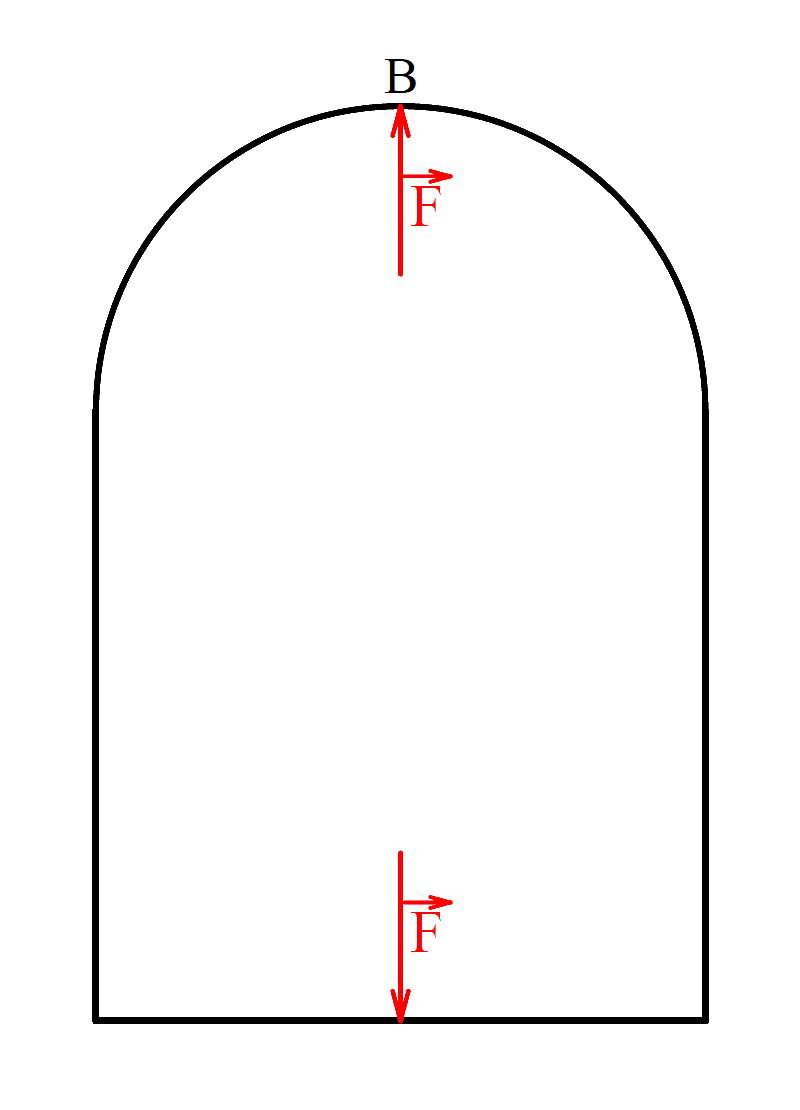

In [2]:
Image(filename='06-o-ram-1.png', width=250)

Využitím symetrie provedeme částečné uvolnění a sestavíme deformační podmínky:
$$\begin{align}
u_{Bx} & = 0  \\
\varphi_B & = 0
\end{align}$$

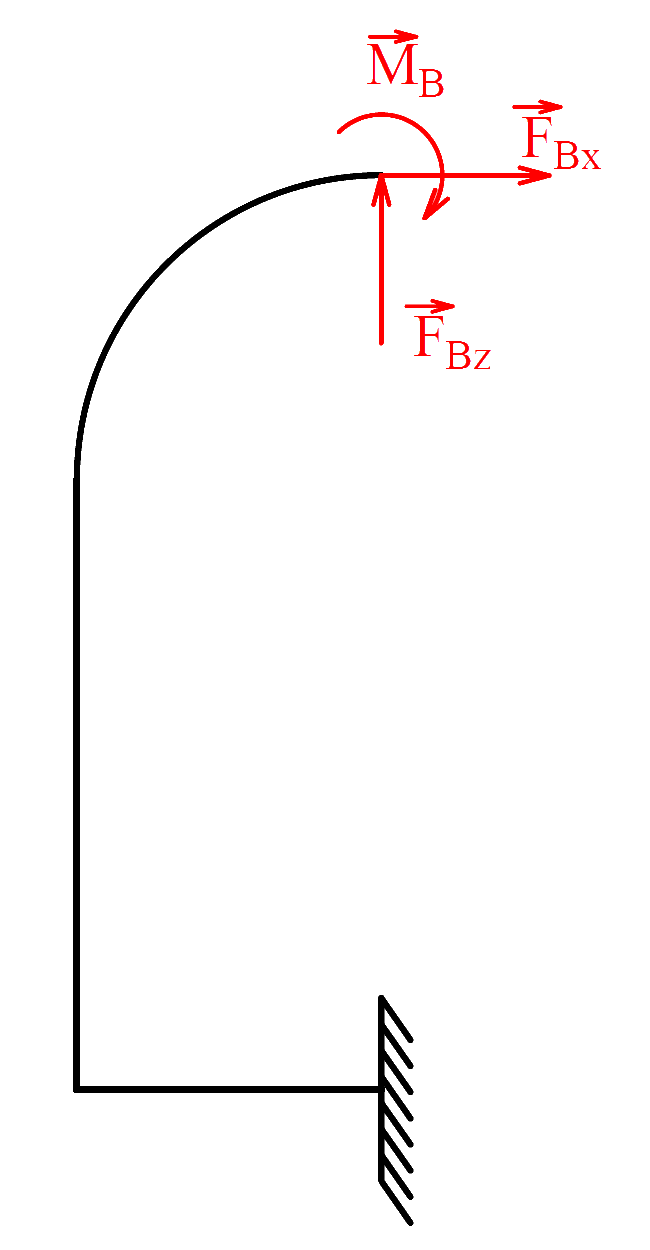

In [3]:
Image(filename='06-o-ram-2.png', width=200)

Zavedeme potřebné proměnné jako symboly.

In [4]:
F,a,R=sp.symbols('F a R')
fi1,x2,x3=sp.symbols('varphi_1 x2 x3')
FBx,FBz,MB=sp.symbols('F_Bx F_Bz M_B')
E,J=sp.symbols('E J')
wBz=sp.symbols('w_Bz')

Vyjádříme momentové vnitřní účinky jednotlivých úseků.

In [5]:
Moy1=-MB+FBz*R*sp.sin(fi1)-FBx*R*(1-sp.cos(fi1))
Moy2=-MB+FBz*R-FBx*(R+x2)
Moy3=-MB+FBz*(R-x3)-FBx*(R+a)
Moy1,Moy2,Moy3

Derivujeme jednotlivé úseky podle síly $F_{Bx}$ a momentu $M_B$.

In [6]:
dMoy1dM=Moy1.diff(MB)
dMoy1dFBx=Moy1.diff(FBx)
dMoy2dM=Moy2.diff(MB)
dMoy2dFBx=Moy2.diff(FBx)
dMoy3dM=Moy3.diff(MB)
dMoy3dFBx=Moy3.diff(FBx)
dMoy1dM,dMoy2dM,dMoy3dM,dMoy1dFBx,dMoy2dFBx,dMoy3dFBx

Sestavíme rovnice dle deformačních podmínek a vyjádříme sílu $F_{Bz}$.

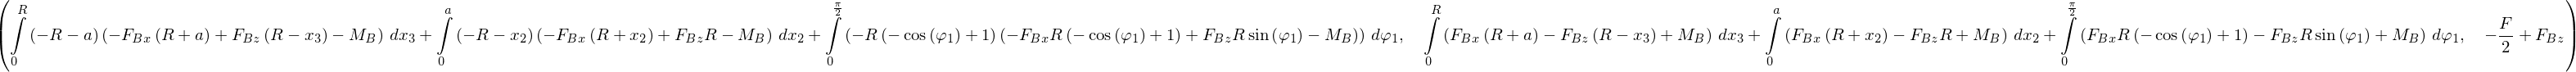

In [7]:
eqn1=sp.Integral(Moy1*dMoy1dFBx,[fi1,0,sp.pi/2])+ \
     sp.Integral(Moy2*dMoy2dFBx,[x2,0,a])+ \
     sp.Integral(Moy3*dMoy3dFBx,[x3,0,R])
eqn2=sp.Integral(Moy1*dMoy1dM,[fi1,0,sp.pi/2])+ \
     sp.Integral(Moy2*dMoy2dM,[x2,0,a])+ \
     sp.Integral(Moy3*dMoy3dM,[x3,0,R])
eqn3=FBz-F/2
eqn1,eqn2,eqn3

Spočteme soustavu rovnic, čímž získáme $F_{Bx}$, $F_{Bz}$ a $M_{B}$.

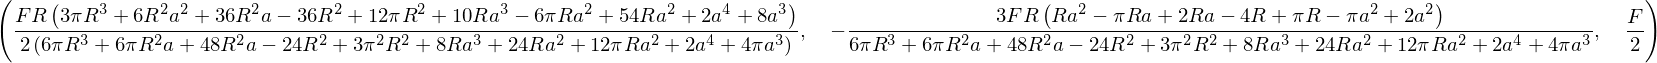

In [8]:
eqn1_,eqn2_=eqn1.doit(),eqn2.doit()
eqn1_=sp.expand(eqn1_)
eqn2_=sp.expand(eqn2_)
sol=sp.linsolve([eqn1_,eqn2_,eqn3],[MB,FBx,FBz])
MB_solved,FBx_solved,FBz_solved=next(iter(sol))
MB_solved,FBx_solved,FBz_solved

Zavedeme číselné hodnoty veličin.
$$\begin{align}
a & = 3000\, \mathrm{mm} \\
R & = 1500\, \mathrm{mm} \\
D & = 50\, \mathrm{mm} \\
F & = 1000\, \mathrm{N} \\
E & = 2.1\cdot 10^5\, \mathrm{MPa} \\
J & = \frac{\pi d^4}{64} \approx 306796\, \mathrm{mm^4}\\
\end{align}$$

In [9]:
a_,R_=3000.,1500.
F_=1000.
D_=50.
E_=2.1e5
J_=sp.pi*D_**4/64.

Čísla dosadíme do rovnic $F_{Bx}$, $F_{Bz}$ a $M_{B}$.

In [10]:
FBx_=FBx_solved.subs({F:F_,a:a_,R:R_})
FBz_=FBz_solved.subs({F:F_,a:a_,R:R_})
MB_=MB_solved.subs({F:F_,a:a_,R:R_})
sp.N(FBx_,6),sp.N(FBz_,6),sp.N(MB_,6)

Jednitlivé úseky zderivujeme podle $F_{Bz}$.

In [11]:
dMoy1dFBz=Moy1.diff(FBz)
dMoy2dFBz=Moy2.diff(FBz)
dMoy3dFBz=Moy3.diff(FBz)
dMoy1dFBz,dMoy2dFBz,dMoy3dFBz

Sestrojíme rovnici pro posuv ve směru $y$ a vyjádříme z rovnice $w_{Bz}$.

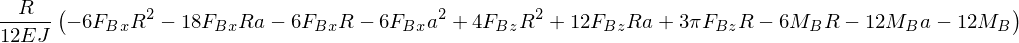

In [12]:
eqn=1/(E*J)*(sp.Integral(Moy1*dMoy1dFBz,[fi1,0,sp.pi/2])+sp.Integral(Moy2*dMoy2dFBz,[x2,0,a])+sp.Integral(Moy3*dMoy3dFBz,[x3,0,R]))-wBz
eqn_=eqn.doit()
sol_wBz=sp.solve(eqn_,wBz)
sol_wBz[0]

Dosadíme číselné hodnoty do rovnice a získáme $w_{Bz}$ v [mm].

In [13]:
wBz_=sol_wBz[0].subs({F:F_,a:a_,R:R_,FBx:FBx_,FBz:FBz_,MB:MB_,E:E_,J:J_})
sp.N(wBz_,4)